In [1]:
import os
import glob
import dicom_contour.contour as dcm
from dicom_contour.contour import *
import SimpleITK as sitk
import pandas as pd
import nrrd
import pickle

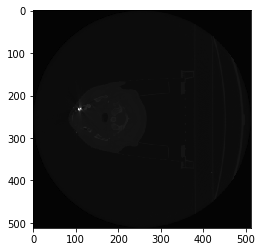

In [10]:
plt.imshow(image[:,:,102], cmap = 'gray')
plt.show()

ModuleNotFoundError: No module named 'plastimatch'

In [2]:
da = pd.read_csv('/cluster/home/rreiazi/radcure_DA_labels.csv')
no_da = da.loc[da['has_artifact'] == 0, 'patient_id'].to_list()
weak_da = da.loc[da['has_artifact'] == 1, 'patient_id'].to_list()
less_da = weak_da + no_da
np.shape(less_da)

(1921,)

In [3]:
rad_tox = pd.read_csv('radioTox.csv')
tox_ids = rad_tox['ID'].to_list()

In [4]:
import os

path_mask_joe = r'/cluster/projects/radiomics/Temp/OARS050120/masks'
path_save = r'/cluster/projects/radiomics/Temp/MandReza/masks'
for i in range(100,150,25): 
    fileName = os.listdir(path_mask_joe)[i]    
    file  = os.path.join(path_mask_joe, fileName)
    print(file)
    data,d = nrrd.read(file)
    print(data.shape)
    data[data!=7] = 0
    data[data ==1] = 1
    fileNew = os.path.join(path_save,fileName)
    print(fileNew)
    nrrd.write(fileNew,data,header=None)
    data1,d = nrrd.read(fileNew)
    print(data1.shape)

/cluster/projects/radiomics/Temp/OARS050120/masks/4291001.nrrd
(500, 500, 118)
/cluster/projects/radiomics/Temp/MandReza/masks/4291001.nrrd
(500, 500, 118)
/cluster/projects/radiomics/Temp/OARS050120/masks/4075766.nrrd
(500, 500, 122)
/cluster/projects/radiomics/Temp/MandReza/masks/4075766.nrrd
(500, 500, 122)


In [5]:
# np.where(data == 7)
# plt.imshow(data1[:,:,85])
# plt.show()

In [6]:
# plt.imshow(img[:,:,95])
# plt.show()

In [7]:
# plt.imshow(mask_joe[:,:,95])
# plt.show()

In [8]:
# plt.imshow(mask_reza[:,:,95])
# plt.show()

In [9]:
# plt.imshow(mask_reza_new[95,:,:])
# plt.show()

In [17]:
def save_obj(path,obj, name ):
    with open(path + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(path,name):
    with open(path + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [18]:
# path_features = r'/cluster/projects/radiomics/Temp/MandReza/features/first/'
# features =  []
# index = []
# for i in (os.listdir(path_features)):
#     name = i.split('.')[0]
#     index.append(int(name))
#     feat = load_obj(path_features,name)
#     features.append(feat.values())  
    
# mand_features = pd.DataFrame(features, index = index, columns = feat.keys())

In [19]:
# mand_features.head()

In [20]:
# mand_features.to_csv('mand_features.csv')

In [21]:
mand_features = pd.read_csv('mand_features.csv')
mand_features.rename(columns = {'Unnamed: 0':'ID'}, inplace = True)
mand_features.set_index(['ID'], inplace = True)

In [22]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(mand_features.iloc[:,22:])
Newfeat = scaler.transform(mand_features.iloc[:,22:])
radiomics = pd.DataFrame(Newfeat, index = mand_features.index, columns = mand_features.columns[22:])
All_Features = radiomics.columns.to_list()

In [23]:
radiomics.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,lbp-3D-k_gldm_GrayLevelNonUniformity,lbp-3D-k_gldm_GrayLevelVariance,lbp-3D-k_gldm_HighGrayLevelEmphasis,lbp-3D-k_gldm_LargeDependenceEmphasis,lbp-3D-k_gldm_LargeDependenceHighGrayLevelEmphasis,lbp-3D-k_gldm_LargeDependenceLowGrayLevelEmphasis,lbp-3D-k_gldm_LowGrayLevelEmphasis,lbp-3D-k_gldm_SmallDependenceEmphasis,lbp-3D-k_gldm_SmallDependenceHighGrayLevelEmphasis,lbp-3D-k_gldm_SmallDependenceLowGrayLevelEmphasis
ID,,,,,,,,,,,,,,,,,,,,,
3906031,0.117655,-0.094018,-0.237497,-0.319910,-0.076646,0.342963,-0.110115,0.093747,-0.170902,-0.146283,...,-0.126512,-0.195319,-0.194186,-0.092471,-0.108840,-0.084243,0.194186,-0.811963,-0.918792,-0.471983
4054987,-0.638718,-1.736324,-1.052421,1.731187,0.368966,0.405633,1.684761,0.128552,-0.781024,0.705252,...,-0.720651,-0.890708,-0.872811,-0.843394,-1.030283,-0.798303,0.872811,-0.196081,-0.378573,0.337766
4392954,0.258965,1.365717,0.976289,-0.674697,-0.440358,0.208585,-0.242639,-0.053497,0.560110,-0.307564,...,0.657534,-0.223350,-0.221922,0.647426,0.699454,0.642551,0.221922,-0.283044,-0.244490,-0.379709
3755617,-0.463644,1.006862,0.598869,-0.727644,0.591124,-0.241565,0.639774,0.001992,0.913755,-0.962478,...,0.891087,0.686864,0.696200,0.374294,0.567792,0.335397,-0.696200,-0.872832,-0.827015,-0.968229
3885484,0.059645,0.026432,0.378833,0.601477,0.260250,0.662504,0.117852,0.476445,1.043486,0.530197,...,1.221020,-0.511911,-0.505558,1.006922,0.979745,1.021890,0.505558,-0.397759,-0.296578,-0.669689


In [24]:
from lifelines.utils import datetimes_to_durations,  survival_table_from_events
def survival_info_adding(df: pd.DataFrame):
    df['Last Event'] = df['Last FU']
    df['Event'] = (df['Status'] == 'Dead')
    df.loc[df['Event'] , 'Last Event'] = df.loc[df['Event'], 'Date of Death']
    start_date = df['RT End']
    end_date = df['Last Event']
    T_old, _ = datetimes_to_durations(start_date, end_date)
    df['Survival Time'] = T_old /365
    df['High_Risk'] = df['Survival Time']<= 4
    return df

In [25]:
ls

analysis.ipynb             mand_features.csv           radioTox.csv
Br1.xlsx                   Mandible_analysis.ipynb     result/
CE_administration.ipynb    Mandible_extraction.ipynb   result0000.csv
CL1.csv                    mask.py                     scp1.py
CL2.csv                    meta_complete.csv           scp.ipynb
cl2.xlsx                   meta.csv                    segmentation.ipynb
CL3.csv                    meta_new.csv                tgrc-allcase.py
cl3.xlsx                   __pycache__/                tgrc.py
CL4.csv                    radcure_all_rois.csv        ToxDatePrediction1.csv
cl4.xlsx                   radcure_DA_labels.csv       ToxDatePrediction2.csv
clinics.xlsx               radioHPV.csv                toxicity.py
Colin_det.py               radiomicsComplete.csv       Toxicity.xlsx
Data_By_Aquisition_v6.csv  radiomicsComplete_meta.csv  utils.py
feature_mandible.csv       radiomicsCompleteNew.csv
mandfeat.csv               radiomics.csv


In [29]:
# CT dicom metadata
meta = pd.read_csv('meta_new.csv')
meta = meta.set_index('ID', drop = True)
meta.drop(['Unnamed: 0'], axis = 1, inplace = True)

meta_loc = pd.read_csv('meta.csv')
meta_loc.drop(['Unnamed: 0'], axis = 1, inplace = True)
meta_loc = meta_loc.set_index('ID', drop = True)


# Clinical features
clinic = pd.read_excel('clinics.xlsx')
clinic = survival_info_adding(clinic)
clinic = clinic.set_index('MRN', drop = True)
clinic['1st G3-4 Late Tox'].replace('yes', 'Yes', inplace  = True)

/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/lifelines/utils/__init__.py:700: UserWarning: Warning: some values of start_times are after end_times.

  warnings.warn("Warning: some values of start_times are after end_times.\n", UserWarning)


In [30]:
replacement = {'CE': 'With CE','IV':'With CE','VISAPAQUE':'With CE','VISAPQUE': 'With CE',
              'VISIPAQUE IV':'With CE','IV VISIPAQUE':'With CE','VISIPAQUE':'With CE', 'Unreported': 'Without CE'}
meta.replace(replacement, inplace  = True)
meta['ContrastBolusAgent'].value_counts()

With CE       1635
Without CE     887
Y                1
H/N              1
H&N              1
Name: ContrastBolusAgent, dtype: int64

In [31]:
_mand = radiomics.loc[radiomics.index.isin(clinic.loc[clinic['1st G3-4 Late Tox'].notnull()].index)].index
_tox = clinic.loc[clinic['1st G3-4 Late Tox'].notnull()].index

In [94]:
with_bone = clinic.loc[clinic['Type of 1st G3-4 Late Tox'] == 'Bone Tox (ORN etc)'].index
image = r'/cluster/projects/radiomics/Temp/OARS050120/masks/'

In [95]:
with_image = [int(i.split('.')[0]) for i in os.listdir(image)]
with_bone_and_image = [i for i in with_bone if i in with_image]

In [ ]:
with_bone_and_image = []
with_problem = []
for i in os.listdir(image):
    
    try:
        mask, info = nrrd.read(os.path.join(image,i))
        if np.any(mask == 7) == True:
            with_bone_and_image.append(i)
    except:
        with_problem.append(i)
        

In [122]:
with_bone_and_image

True

In [32]:
not_in_mand = [str(i) for i in _tox if i not in _mand]

In [33]:
path = '/cluster/home/rreiazi/clinic'
save_obj(path,not_in_mand, 'not_in_mand')

In [34]:
tox = clinic.loc[_mand, '1st G3-4 Late Tox']
toxType = clinic.loc[_mand, 'Type of 1st G3-4 Late Tox']
radioTox = radiomics.loc[tox.index]
radioTox['tox'] = tox
radioTox['toxType'] = toxType

In [35]:
radioTox['tox'].replace('Yes', 1, inplace = True)
radioTox['tox'].replace('No', 0, inplace =  True)
radioTox['tox'].value_counts()

1    385
0    230
Name: tox, dtype: int64

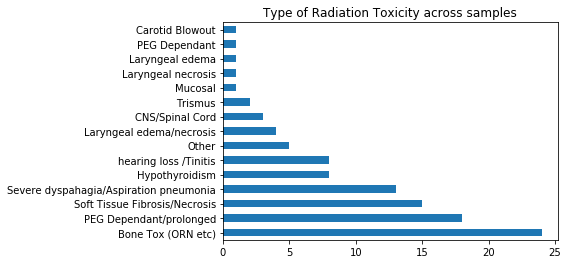

In [37]:
radioTox_no_da = radioTox.loc[radioTox.index.isin(no_da)]
radioTox_no_da['tox'].value_counts()
radioTox_no_da['toxType'].value_counts().plot.barh(title = 'Type of Radiation Toxicity across samples')

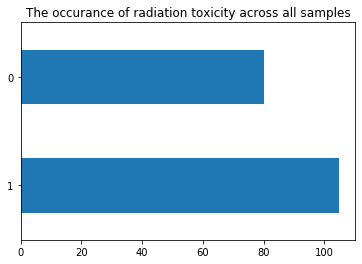

In [44]:
radioTox_no_da['tox'].value_counts().plot.barh(title = 'The occurance of radiation toxicity across all samples')

/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


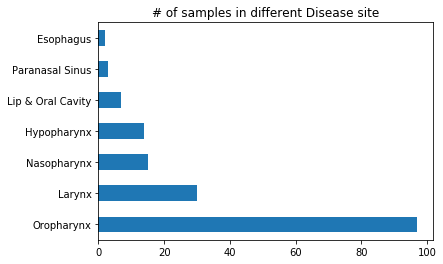

In [38]:
meta_loc.loc[radioTox_no_da.index, 'Location'].value_counts().plot.barh(title = '# of samples in different Disease site')

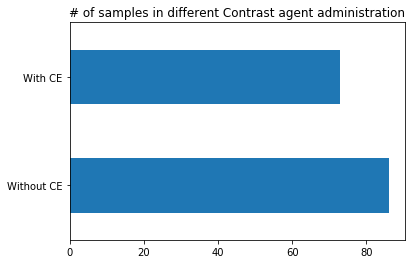

In [39]:
meta.loc[radioTox_no_da.index, 'ContrastBolusAgent'].value_counts().plot.barh(title = '# of samples in different Contrast agent administration')

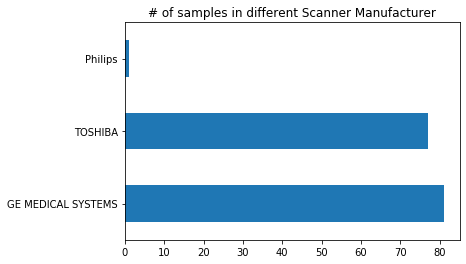

In [40]:
meta.loc[radioTox_no_da.index, 'Manufacturer'].value_counts().plot.barh(title = '# of samples in different Scanner Manufacturer')

In [41]:
from pymrmre import mrmr

def mrmr_feat(data,solution_length):
    solutions = mrmr.mrmr_ensemble(features=data, 
              target_features=[data.shape[1]-1], 
              feature_types=list(np.zeros(len(data.columns))), solution_length=solution_length)
    mrmr_ = solutions[0][0]
    return mrmr_

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

def train_model(x_train,y_train):
    clf = RandomForestClassifier()

    random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 300, stop = 600, num = 20)],
                   'max_features': ['auto'],
                   'max_depth': [10,15,20,25,30,35],
                   'min_samples_split': [3,4,5,6],
                   'min_samples_leaf': [2,3,4],
                   'bootstrap': [True]}
    
    RS = RandomizedSearchCV(estimator = clf, param_distributions = random_grid,n_iter = 20, cv = 5, verbose=0,n_jobs = -1)

    RS.fit(x_train, y_train)
#     print(RS.best_params_)
    clf.set_params(**RS.best_params_)
    print(f'train features: {x_train.columns}')
          
    model = clf.fit(x_train,y_train)
    return model

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

def test_model(model,x_test, y_test):
    print(f'test features: {x_test.columns}')
    y_prob = model.predict_proba(x_test)[:,1]
    auc    = roc_auc_score(y_test,y_prob)
    fpr, tpr, thresholds = roc_curve(y_test,y_prob)  
  
    return fpr,tpr,auc

In [288]:
from sklearn.model_selection import train_test_split
from sklearn.utils.random import sample_without_replacement as rsm

cl = pd.DataFrame(columns=['fpr','tpr','auc'])


data = radioTox_no_da.copy()
# data.iloc[:,:-1] =np.random.uniform(-1,1,[radioTox_no_da.shape[0],radioTox_no_da.shape[1]-1])
# data = data.sample(10,axis = 1,random_state=1)



for i in range(100):  
    print('Tox study round number "',i)
    print('-------------------------------')
    print('Data splitting ...')
    

    train, test =train_test_split (data.iloc[rsm(len(data),len(data)*0.8)], test_size=0.25)
    
#     feat = mrmr_feat (data.loc[train.index],5)

#     model = train_model(train[feat],train['tox'])
    y_train = train['tox']
    train = train.drop(['tox'], axis = 1)
    train = train.iloc[:,np.random.randint(1,train.shape[1],5)]
                       
    model = train_model(train,y_train)
    
    fpr,tpr,auc = test_model(model, test[train.columns],test['tox'])

    
    cl = cl.append({'fpr':fpr,'tpr':tpr,'auc':auc}, ignore_index=True)
    

    print('-------------------------------')
    print('Job ', i, ' is done')

Tox study round number " 0
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['gradient_gldm_DependenceNonUniformityNormalized',
       'original_glrlm_RunLengthNonUniformity', 'wavelet-LLH_glcm_Correlation',
       'wavelet-LLL_firstorder_Mean', 'wavelet-LHL_glrlm_LongRunEmphasis'],
      dtype='object')
test features: Index(['gradient_gldm_DependenceNonUniformityNormalized',
       'original_glrlm_RunLengthNonUniformity', 'wavelet-LLH_glcm_Correlation',
       'wavelet-LLL_firstorder_Mean', 'wavelet-LHL_glrlm_LongRunEmphasis'],
      dtype='object')
-------------------------------
Job  0  is done
Tox study round number " 1
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['log-sigma-1-mm-3D_glcm_ClusterProminence',
       'wavelet-LHH_glszm_GrayLevelNonUniformity',
       'square_gldm_SmallDependenceHighGrayLevelEmphasis',
       'squareroot_glszm_LargeAreaEmphasis', 'wavelet-LHL_glszm_ZoneEntropy'],
      dtype='object')
test features: Index(['log-sigma-1-mm-3D_glcm_ClusterProminence',
       'wavelet-LHH_glszm_GrayLevelNonUniformity',
       'square_gldm_SmallDependenceHighGrayLevelEmphasis',
       'squareroot_glszm_LargeAreaEmphasis', 'wavelet-LHL_glszm_ZoneEntropy'],
      dtype='object')
-------------------------------
Job  1  is done
Tox study round number " 2
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['log-sigma-1-mm-3D_glrlm_LongRunEmphasis',
       'exponential_glrlm_ShortRunLowGrayLevelEmphasis',
       'squareroot_glcm_JointAverage',
       'original_gldm_LargeDependenceLowGrayLevelEmphasis',
       'wavelet-LHL_firstorder_Variance'],
      dtype='object')
test features: Index(['log-sigma-1-mm-3D_glrlm_LongRunEmphasis',
       'exponential_glrlm_ShortRunLowGrayLevelEmphasis',
       'squareroot_glcm_JointAverage',
       'original_gldm_LargeDependenceLowGrayLevelEmphasis',
       'wavelet-LHL_firstorder_Variance'],
      dtype='object')
-------------------------------
Job  2  is done
Tox study round number " 3
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-LHH_firstorder_Uniformity', 'lbp-3D-m1_glcm_MCC',
       'lbp-3D-m2_firstorder_InterquartileRange', 'squareroot_glcm_Idm',
       'logarithm_gldm_DependenceEntropy'],
      dtype='object')
test features: Index(['wavelet-LHH_firstorder_Uniformity', 'lbp-3D-m1_glcm_MCC',
       'lbp-3D-m2_firstorder_InterquartileRange', 'squareroot_glcm_Idm',
       'logarithm_gldm_DependenceEntropy'],
      dtype='object')
-------------------------------
Job  3  is done
Tox study round number " 4
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['log-sigma-3-mm-3D_gldm_GrayLevelNonUniformity',
       'logarithm_gldm_DependenceNonUniformity',
       'wavelet-HLH_gldm_DependenceEntropy',
       'wavelet-HLH_glcm_ClusterTendency',
       'exponential_glrlm_ShortRunLowGrayLevelEmphasis'],
      dtype='object')
test features: Index(['log-sigma-3-mm-3D_gldm_GrayLevelNonUniformity',
       'logarithm_gldm_DependenceNonUniformity',
       'wavelet-HLH_gldm_DependenceEntropy',
       'wavelet-HLH_glcm_ClusterTendency',
       'exponential_glrlm_ShortRunLowGrayLevelEmphasis'],
      dtype='object')
-------------------------------
Job  4  is done
Tox study round number " 5
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['log-sigma-1-mm-3D_glcm_MaximumProbability',
       'lbp-3D-k_gldm_SmallDependenceEmphasis',
       'wavelet-HLH_firstorder_Uniformity', 'wavelet-HHL_glcm_SumAverage',
       'squareroot_glcm_MaximumProbability'],
      dtype='object')
test features: Index(['log-sigma-1-mm-3D_glcm_MaximumProbability',
       'lbp-3D-k_gldm_SmallDependenceEmphasis',
       'wavelet-HLH_firstorder_Uniformity', 'wavelet-HHL_glcm_SumAverage',
       'squareroot_glcm_MaximumProbability'],
      dtype='object')
-------------------------------
Job  5  is done
Tox study round number " 6
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['square_firstorder_Minimum', 'wavelet-HLH_glrlm_LongRunEmphasis',
       'wavelet-HHL_firstorder_Mean', 'lbp-3D-m2_firstorder_Entropy',
       'wavelet-LLL_glcm_MaximumProbability'],
      dtype='object')
test features: Index(['square_firstorder_Minimum', 'wavelet-HLH_glrlm_LongRunEmphasis',
       'wavelet-HHL_firstorder_Mean', 'lbp-3D-m2_firstorder_Entropy',
       'wavelet-LLL_glcm_MaximumProbability'],
      dtype='object')
-------------------------------
Job  6  is done
Tox study round number " 7
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HLL_firstorder_Kurtosis',
       'lbp-3D-m2_gldm_DependenceNonUniformity',
       'wavelet-HLH_gldm_LargeDependenceLowGrayLevelEmphasis',
       'logarithm_glcm_ClusterProminence', 'lbp-3D-m2_glcm_ClusterProminence'],
      dtype='object')
test features: Index(['wavelet-HLL_firstorder_Kurtosis',
       'lbp-3D-m2_gldm_DependenceNonUniformity',
       'wavelet-HLH_gldm_LargeDependenceLowGrayLevelEmphasis',
       'logarithm_glcm_ClusterProminence', 'lbp-3D-m2_glcm_ClusterProminence'],
      dtype='object')
-------------------------------
Job  7  is done
Tox study round number " 8
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['gradient_glszm_GrayLevelNonUniformityNormalized',
       'wavelet-HHL_glrlm_ShortRunHighGrayLevelEmphasis',
       'exponential_glszm_LargeAreaEmphasis', 'original_firstorder_Variance',
       'lbp-3D-m2_glcm_ClusterShade'],
      dtype='object')
test features: Index(['gradient_glszm_GrayLevelNonUniformityNormalized',
       'wavelet-HHL_glrlm_ShortRunHighGrayLevelEmphasis',
       'exponential_glszm_LargeAreaEmphasis', 'original_firstorder_Variance',
       'lbp-3D-m2_glcm_ClusterShade'],
      dtype='object')
-------------------------------
Job  8  is done
Tox study round number " 9
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['lbp-3D-k_glrlm_ShortRunLowGrayLevelEmphasis',
       'log-sigma-1-mm-3D_glrlm_RunLengthNonUniformity',
       'log-sigma-3-mm-3D_glrlm_ShortRunHighGrayLevelEmphasis',
       'wavelet-HLH_glszm_ZonePercentage', 'squareroot_glcm_SumAverage'],
      dtype='object')
test features: Index(['lbp-3D-k_glrlm_ShortRunLowGrayLevelEmphasis',
       'log-sigma-1-mm-3D_glrlm_RunLengthNonUniformity',
       'log-sigma-3-mm-3D_glrlm_ShortRunHighGrayLevelEmphasis',
       'wavelet-HLH_glszm_ZonePercentage', 'squareroot_glcm_SumAverage'],
      dtype='object')
-------------------------------
Job  9  is done
Tox study round number " 10
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-LLL_glrlm_RunVariance', 'wavelet-HHH_firstorder_Kurtosis',
       'squareroot_glcm_Imc2', 'wavelet-LLH_glszm_GrayLevelNonUniformity',
       'lbp-3D-k_glcm_Imc1'],
      dtype='object')
test features: Index(['wavelet-LLL_glrlm_RunVariance', 'wavelet-HHH_firstorder_Kurtosis',
       'squareroot_glcm_Imc2', 'wavelet-LLH_glszm_GrayLevelNonUniformity',
       'lbp-3D-k_glcm_Imc1'],
      dtype='object')
-------------------------------
Job  10  is done
Tox study round number " 11
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['log-sigma-3-mm-3D_gldm_GrayLevelNonUniformity',
       'square_firstorder_RobustMeanAbsoluteDeviation',
       'wavelet-HLL_firstorder_Entropy', 'wavelet-HLL_glcm_Idmn',
       'log-sigma-1-mm-3D_glszm_ZoneVariance'],
      dtype='object')
test features: Index(['log-sigma-3-mm-3D_gldm_GrayLevelNonUniformity',
       'square_firstorder_RobustMeanAbsoluteDeviation',
       'wavelet-HLL_firstorder_Entropy', 'wavelet-HLL_glcm_Idmn',
       'log-sigma-1-mm-3D_glszm_ZoneVariance'],
      dtype='object')
-------------------------------
Job  11  is done
Tox study round number " 12
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['original_firstorder_Skewness', 'square_firstorder_Median',
       'log-sigma-2-mm-3D_glcm_Autocorrelation',
       'lbp-3D-k_gldm_LargeDependenceEmphasis',
       'logarithm_glszm_SizeZoneNonUniformity'],
      dtype='object')
test features: Index(['original_firstorder_Skewness', 'square_firstorder_Median',
       'log-sigma-2-mm-3D_glcm_Autocorrelation',
       'lbp-3D-k_gldm_LargeDependenceEmphasis',
       'logarithm_glszm_SizeZoneNonUniformity'],
      dtype='object')
-------------------------------
Job  12  is done
Tox study round number " 13
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-LHL_firstorder_Mean', 'logarithm_glcm_Id',
       'wavelet-HLL_glszm_ZoneVariance',
       'log-sigma-2-mm-3D_gldm_SmallDependenceEmphasis',
       'log-sigma-3-mm-3D_firstorder_Kurtosis'],
      dtype='object')
test features: Index(['wavelet-LHL_firstorder_Mean', 'logarithm_glcm_Id',
       'wavelet-HLL_glszm_ZoneVariance',
       'log-sigma-2-mm-3D_gldm_SmallDependenceEmphasis',
       'log-sigma-3-mm-3D_firstorder_Kurtosis'],
      dtype='object')
-------------------------------
Job  13  is done
Tox study round number " 14
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-LLL_glrlm_RunLengthNonUniformityNormalized',
       'wavelet-LHL_glszm_LargeAreaLowGrayLevelEmphasis',
       'exponential_glcm_InverseVariance', 'lbp-3D-k_firstorder_Uniformity',
       'lbp-3D-k_firstorder_Variance'],
      dtype='object')
test features: Index(['wavelet-LLL_glrlm_RunLengthNonUniformityNormalized',
       'wavelet-LHL_glszm_LargeAreaLowGrayLevelEmphasis',
       'exponential_glcm_InverseVariance', 'lbp-3D-k_firstorder_Uniformity',
       'lbp-3D-k_firstorder_Variance'],
      dtype='object')
-------------------------------
Job  14  is done
Tox study round number " 15
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-LLL_glszm_HighGrayLevelZoneEmphasis',
       'wavelet-LHH_firstorder_Energy', 'wavelet-LHH_firstorder_TotalEnergy',
       'original_glcm_Id', 'log-sigma-1-mm-3D_firstorder_RootMeanSquared'],
      dtype='object')
test features: Index(['wavelet-LLL_glszm_HighGrayLevelZoneEmphasis',
       'wavelet-LHH_firstorder_Energy', 'wavelet-LHH_firstorder_TotalEnergy',
       'original_glcm_Id', 'log-sigma-1-mm-3D_firstorder_RootMeanSquared'],
      dtype='object')
-------------------------------
Job  15  is done
Tox study round number " 16
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-LHL_glrlm_LongRunEmphasis',
       'wavelet-LHH_glrlm_ShortRunHighGrayLevelEmphasis', 'square_glcm_Idm',
       'wavelet-LLH_glcm_DifferenceVariance',
       'wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis'],
      dtype='object')
test features: Index(['wavelet-LHL_glrlm_LongRunEmphasis',
       'wavelet-LHH_glrlm_ShortRunHighGrayLevelEmphasis', 'square_glcm_Idm',
       'wavelet-LLH_glcm_DifferenceVariance',
       'wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis'],
      dtype='object')
-------------------------------
Job  16  is done
Tox study round number " 17
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['logarithm_glcm_Idmn', 'square_firstorder_TotalEnergy',
       'logarithm_firstorder_RootMeanSquared',
       'lbp-3D-m2_gldm_LargeDependenceLowGrayLevelEmphasis',
       'logarithm_gldm_SmallDependenceEmphasis'],
      dtype='object')
test features: Index(['logarithm_glcm_Idmn', 'square_firstorder_TotalEnergy',
       'logarithm_firstorder_RootMeanSquared',
       'lbp-3D-m2_gldm_LargeDependenceLowGrayLevelEmphasis',
       'logarithm_gldm_SmallDependenceEmphasis'],
      dtype='object')
-------------------------------
Job  17  is done
Tox study round number " 18
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['lbp-3D-m1_gldm_SmallDependenceLowGrayLevelEmphasis',
       'squareroot_glcm_SumAverage', 'wavelet-HHL_glcm_Imc2',
       'wavelet-HHL_glcm_DifferenceAverage', 'wavelet-LLH_glcm_SumAverage'],
      dtype='object')
test features: Index(['lbp-3D-m1_gldm_SmallDependenceLowGrayLevelEmphasis',
       'squareroot_glcm_SumAverage', 'wavelet-HHL_glcm_Imc2',
       'wavelet-HHL_glcm_DifferenceAverage', 'wavelet-LLH_glcm_SumAverage'],
      dtype='object')
-------------------------------
Job  18  is done
Tox study round number " 19
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['lbp-3D-k_gldm_DependenceEntropy', 'squareroot_glcm_Autocorrelation',
       'gradient_glcm_Autocorrelation', 'exponential_glrlm_RunEntropy',
       'wavelet-LHL_glcm_ClusterTendency'],
      dtype='object')
test features: Index(['lbp-3D-k_gldm_DependenceEntropy', 'squareroot_glcm_Autocorrelation',
       'gradient_glcm_Autocorrelation', 'exponential_glrlm_RunEntropy',
       'wavelet-LHL_glcm_ClusterTendency'],
      dtype='object')
-------------------------------
Job  19  is done
Tox study round number " 20
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HLL_gldm_LowGrayLevelEmphasis',
       'logarithm_glszm_SmallAreaHighGrayLevelEmphasis',
       'lbp-3D-k_glcm_JointAverage', 'wavelet-HHH_glcm_SumEntropy',
       'square_firstorder_Skewness'],
      dtype='object')
test features: Index(['wavelet-HLL_gldm_LowGrayLevelEmphasis',
       'logarithm_glszm_SmallAreaHighGrayLevelEmphasis',
       'lbp-3D-k_glcm_JointAverage', 'wavelet-HHH_glcm_SumEntropy',
       'square_firstorder_Skewness'],
      dtype='object')
-------------------------------
Job  20  is done
Tox study round number " 21
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['squareroot_firstorder_Entropy', 'exponential_glszm_ZoneVariance',
       'wavelet-HHH_firstorder_Kurtosis',
       'log-sigma-1-mm-3D_glszm_SizeZoneNonUniformity',
       'squareroot_glcm_JointEnergy'],
      dtype='object')
test features: Index(['squareroot_firstorder_Entropy', 'exponential_glszm_ZoneVariance',
       'wavelet-HHH_firstorder_Kurtosis',
       'log-sigma-1-mm-3D_glszm_SizeZoneNonUniformity',
       'squareroot_glcm_JointEnergy'],
      dtype='object')
-------------------------------
Job  21  is done
Tox study round number " 22
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-LLL_glrlm_RunEntropy', 'square_firstorder_Energy',
       'log-sigma-1-mm-3D_glcm_Autocorrelation', 'lbp-3D-m1_glrlm_RunEntropy',
       'wavelet-HHL_glrlm_LowGrayLevelRunEmphasis'],
      dtype='object')
test features: Index(['wavelet-LLL_glrlm_RunEntropy', 'square_firstorder_Energy',
       'log-sigma-1-mm-3D_glcm_Autocorrelation', 'lbp-3D-m1_glrlm_RunEntropy',
       'wavelet-HHL_glrlm_LowGrayLevelRunEmphasis'],
      dtype='object')
-------------------------------
Job  22  is done
Tox study round number " 23
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HLL_glszm_LargeAreaLowGrayLevelEmphasis',
       'wavelet-HHH_gldm_HighGrayLevelEmphasis', 'lbp-3D-k_glcm_SumEntropy',
       'square_glcm_DifferenceVariance',
       'wavelet-LHH_glrlm_GrayLevelNonUniformityNormalized'],
      dtype='object')
test features: Index(['wavelet-HLL_glszm_LargeAreaLowGrayLevelEmphasis',
       'wavelet-HHH_gldm_HighGrayLevelEmphasis', 'lbp-3D-k_glcm_SumEntropy',
       'square_glcm_DifferenceVariance',
       'wavelet-LHH_glrlm_GrayLevelNonUniformityNormalized'],
      dtype='object')
-------------------------------
Job  23  is done
Tox study round number " 24
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HLL_glcm_Id', 'original_glszm_HighGrayLevelZoneEmphasis',
       'exponential_glcm_DifferenceVariance', 'gradient_glcm_Imc1',
       'wavelet-LLL_glcm_Correlation'],
      dtype='object')
test features: Index(['wavelet-HLL_glcm_Id', 'original_glszm_HighGrayLevelZoneEmphasis',
       'exponential_glcm_DifferenceVariance', 'gradient_glcm_Imc1',
       'wavelet-LLL_glcm_Correlation'],
      dtype='object')
-------------------------------
Job  24  is done
Tox study round number " 25
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-LLH_glszm_SizeZoneNonUniformity',
       'lbp-3D-m2_gldm_SmallDependenceEmphasis',
       'log-sigma-1-mm-3D_glcm_JointAverage',
       'original_shape_Maximum2DDiameterColumn', 'gradient_firstorder_Range'],
      dtype='object')
test features: Index(['wavelet-LLH_glszm_SizeZoneNonUniformity',
       'lbp-3D-m2_gldm_SmallDependenceEmphasis',
       'log-sigma-1-mm-3D_glcm_JointAverage',
       'original_shape_Maximum2DDiameterColumn', 'gradient_firstorder_Range'],
      dtype='object')
-------------------------------
Job  25  is done
Tox study round number " 26
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HHH_firstorder_MeanAbsoluteDeviation',
       'original_glrlm_ShortRunEmphasis', 'lbp-3D-m2_firstorder_Entropy',
       'wavelet-HLH_firstorder_10Percentile',
       'wavelet-LHH_gldm_SmallDependenceEmphasis'],
      dtype='object')
test features: Index(['wavelet-HHH_firstorder_MeanAbsoluteDeviation',
       'original_glrlm_ShortRunEmphasis', 'lbp-3D-m2_firstorder_Entropy',
       'wavelet-HLH_firstorder_10Percentile',
       'wavelet-LHH_gldm_SmallDependenceEmphasis'],
      dtype='object')
-------------------------------
Job  26  is done
Tox study round number " 27
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['lbp-3D-m1_glcm_Id', 'logarithm_glszm_SizeZoneNonUniformityNormalized',
       'wavelet-HHH_glszm_LargeAreaEmphasis',
       'wavelet-HLL_glrlm_RunLengthNonUniformity',
       'log-sigma-1-mm-3D_glcm_Imc1'],
      dtype='object')
test features: Index(['lbp-3D-m1_glcm_Id', 'logarithm_glszm_SizeZoneNonUniformityNormalized',
       'wavelet-HHH_glszm_LargeAreaEmphasis',
       'wavelet-HLL_glrlm_RunLengthNonUniformity',
       'log-sigma-1-mm-3D_glcm_Imc1'],
      dtype='object')
-------------------------------
Job  27  is done
Tox study round number " 28
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['log-sigma-1-mm-3D_glrlm_LongRunHighGrayLevelEmphasis',
       'wavelet-LLL_firstorder_MeanAbsoluteDeviation',
       'wavelet-HHH_glszm_SizeZoneNonUniformity',
       'lbp-3D-m1_gldm_DependenceEntropy',
       'square_gldm_LargeDependenceEmphasis'],
      dtype='object')
test features: Index(['log-sigma-1-mm-3D_glrlm_LongRunHighGrayLevelEmphasis',
       'wavelet-LLL_firstorder_MeanAbsoluteDeviation',
       'wavelet-HHH_glszm_SizeZoneNonUniformity',
       'lbp-3D-m1_gldm_DependenceEntropy',
       'square_gldm_LargeDependenceEmphasis'],
      dtype='object')
-------------------------------
Job  28  is done
Tox study round number " 29
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HLH_gldm_LargeDependenceLowGrayLevelEmphasis',
       'lbp-3D-m2_glszm_GrayLevelNonUniformity',
       'wavelet-HHH_glrlm_LongRunLowGrayLevelEmphasis',
       'lbp-3D-m1_gldm_DependenceVariance', 'lbp-3D-m1_glcm_MCC'],
      dtype='object')
test features: Index(['wavelet-HLH_gldm_LargeDependenceLowGrayLevelEmphasis',
       'lbp-3D-m2_glszm_GrayLevelNonUniformity',
       'wavelet-HHH_glrlm_LongRunLowGrayLevelEmphasis',
       'lbp-3D-m1_gldm_DependenceVariance', 'lbp-3D-m1_glcm_MCC'],
      dtype='object')
-------------------------------
Job  29  is done
Tox study round number " 30
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['log-sigma-3-mm-3D_glcm_DifferenceVariance',
       'lbp-3D-m1_gldm_LargeDependenceHighGrayLevelEmphasis',
       'original_glcm_Id', 'wavelet-HHH_glrlm_RunEntropy',
       'gradient_glrlm_RunEntropy'],
      dtype='object')
test features: Index(['log-sigma-3-mm-3D_glcm_DifferenceVariance',
       'lbp-3D-m1_gldm_LargeDependenceHighGrayLevelEmphasis',
       'original_glcm_Id', 'wavelet-HHH_glrlm_RunEntropy',
       'gradient_glrlm_RunEntropy'],
      dtype='object')
-------------------------------
Job  30  is done
Tox study round number " 31
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-LLH_firstorder_Variance',
       'log-sigma-3-mm-3D_firstorder_Maximum', 'squareroot_glcm_Contrast',
       'lbp-3D-k_glrlm_RunPercentage',
       'lbp-3D-m2_glszm_LowGrayLevelZoneEmphasis'],
      dtype='object')
test features: Index(['wavelet-LLH_firstorder_Variance',
       'log-sigma-3-mm-3D_firstorder_Maximum', 'squareroot_glcm_Contrast',
       'lbp-3D-k_glrlm_RunPercentage',
       'lbp-3D-m2_glszm_LowGrayLevelZoneEmphasis'],
      dtype='object')
-------------------------------
Job  31  is done
Tox study round number " 32
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HLH_glcm_ClusterProminence',
       'exponential_glrlm_HighGrayLevelRunEmphasis',
       'wavelet-HHL_gldm_GrayLevelNonUniformity',
       'gradient_gldm_LargeDependenceLowGrayLevelEmphasis',
       'wavelet-HLL_glrlm_ShortRunLowGrayLevelEmphasis'],
      dtype='object')
test features: Index(['wavelet-HLH_glcm_ClusterProminence',
       'exponential_glrlm_HighGrayLevelRunEmphasis',
       'wavelet-HHL_gldm_GrayLevelNonUniformity',
       'gradient_gldm_LargeDependenceLowGrayLevelEmphasis',
       'wavelet-HLL_glrlm_ShortRunLowGrayLevelEmphasis'],
      dtype='object')
-------------------------------
Job  32  is done
Tox study round number " 33
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['squareroot_glcm_Idmn', 'wavelet-HLH_gldm_DependenceVariance',
       'log-sigma-1-mm-3D_gldm_SmallDependenceLowGrayLevelEmphasis',
       'original_shape_Maximum2DDiameterColumn',
       'exponential_firstorder_Median'],
      dtype='object')
test features: Index(['squareroot_glcm_Idmn', 'wavelet-HLH_gldm_DependenceVariance',
       'log-sigma-1-mm-3D_gldm_SmallDependenceLowGrayLevelEmphasis',
       'original_shape_Maximum2DDiameterColumn',
       'exponential_firstorder_Median'],
      dtype='object')
-------------------------------
Job  33  is done
Tox study round number " 34
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['squareroot_glcm_JointEnergy',
       'original_glszm_SmallAreaLowGrayLevelEmphasis',
       'log-sigma-1-mm-3D_glrlm_ShortRunLowGrayLevelEmphasis',
       'lbp-3D-m1_firstorder_RobustMeanAbsoluteDeviation',
       'wavelet-HLH_glcm_DifferenceVariance'],
      dtype='object')
test features: Index(['squareroot_glcm_JointEnergy',
       'original_glszm_SmallAreaLowGrayLevelEmphasis',
       'log-sigma-1-mm-3D_glrlm_ShortRunLowGrayLevelEmphasis',
       'lbp-3D-m1_firstorder_RobustMeanAbsoluteDeviation',
       'wavelet-HLH_glcm_DifferenceVariance'],
      dtype='object')
-------------------------------
Job  34  is done
Tox study round number " 35
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HLL_glszm_SmallAreaLowGrayLevelEmphasis',
       'square_glrlm_RunPercentage', 'wavelet-LHL_firstorder_Uniformity',
       'wavelet-HLL_firstorder_Skewness', 'exponential_firstorder_Uniformity'],
      dtype='object')
test features: Index(['wavelet-HLL_glszm_SmallAreaLowGrayLevelEmphasis',
       'square_glrlm_RunPercentage', 'wavelet-LHL_firstorder_Uniformity',
       'wavelet-HLL_firstorder_Skewness', 'exponential_firstorder_Uniformity'],
      dtype='object')
-------------------------------
Job  35  is done
Tox study round number " 36
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HLL_firstorder_RobustMeanAbsoluteDeviation',
       'wavelet-HHL_firstorder_Uniformity', 'gradient_glszm_ZoneVariance',
       'wavelet-HLL_glcm_Correlation', 'logarithm_firstorder_Variance'],
      dtype='object')
test features: Index(['wavelet-HLL_firstorder_RobustMeanAbsoluteDeviation',
       'wavelet-HHL_firstorder_Uniformity', 'gradient_glszm_ZoneVariance',
       'wavelet-HLL_glcm_Correlation', 'logarithm_firstorder_Variance'],
      dtype='object')
-------------------------------
Job  36  is done
Tox study round number " 37
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['gradient_glcm_SumEntropy',
       'wavelet-HLL_glszm_SizeZoneNonUniformityNormalized',
       'lbp-3D-k_gldm_SmallDependenceHighGrayLevelEmphasis',
       'exponential_glcm_JointEntropy', 'lbp-3D-m1_glszm_ZoneEntropy'],
      dtype='object')
test features: Index(['gradient_glcm_SumEntropy',
       'wavelet-HLL_glszm_SizeZoneNonUniformityNormalized',
       'lbp-3D-k_gldm_SmallDependenceHighGrayLevelEmphasis',
       'exponential_glcm_JointEntropy', 'lbp-3D-m1_glszm_ZoneEntropy'],
      dtype='object')
-------------------------------
Job  37  is done
Tox study round number " 38
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-LHL_gldm_SmallDependenceEmphasis',
       'lbp-3D-m1_glcm_JointEnergy', 'square_glcm_Autocorrelation',
       'lbp-3D-m1_gldm_HighGrayLevelEmphasis',
       'wavelet-LHH_firstorder_Skewness'],
      dtype='object')
test features: Index(['wavelet-LHL_gldm_SmallDependenceEmphasis',
       'lbp-3D-m1_glcm_JointEnergy', 'square_glcm_Autocorrelation',
       'lbp-3D-m1_gldm_HighGrayLevelEmphasis',
       'wavelet-LHH_firstorder_Skewness'],
      dtype='object')
-------------------------------
Job  38  is done
Tox study round number " 39
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['exponential_gldm_LargeDependenceEmphasis',
       'wavelet-LHH_glrlm_RunPercentage',
       'wavelet-HLH_glcm_DifferenceVariance',
       'wavelet-HHH_glszm_GrayLevelVariance', 'exponential_glszm_ZoneEntropy'],
      dtype='object')
test features: Index(['exponential_gldm_LargeDependenceEmphasis',
       'wavelet-LHH_glrlm_RunPercentage',
       'wavelet-HLH_glcm_DifferenceVariance',
       'wavelet-HHH_glszm_GrayLevelVariance', 'exponential_glszm_ZoneEntropy'],
      dtype='object')
-------------------------------
Job  39  is done
Tox study round number " 40
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['log-sigma-3-mm-3D_gldm_DependenceNonUniformityNormalized',
       'wavelet-LHL_glszm_SizeZoneNonUniformityNormalized',
       'wavelet-LHL_firstorder_Kurtosis', 'lbp-3D-m1_glszm_GrayLevelVariance',
       'original_gldm_LowGrayLevelEmphasis'],
      dtype='object')
test features: Index(['log-sigma-3-mm-3D_gldm_DependenceNonUniformityNormalized',
       'wavelet-LHL_glszm_SizeZoneNonUniformityNormalized',
       'wavelet-LHL_firstorder_Kurtosis', 'lbp-3D-m1_glszm_GrayLevelVariance',
       'original_gldm_LowGrayLevelEmphasis'],
      dtype='object')
-------------------------------
Job  40  is done
Tox study round number " 41
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-LLL_glszm_ZoneVariance', 'exponential_glcm_Imc2',
       'wavelet-LHL_glszm_LargeAreaEmphasis', 'wavelet-LHH_glrlm_RunVariance',
       'exponential_gldm_DependenceVariance'],
      dtype='object')
test features: Index(['wavelet-LLL_glszm_ZoneVariance', 'exponential_glcm_Imc2',
       'wavelet-LHL_glszm_LargeAreaEmphasis', 'wavelet-LHH_glrlm_RunVariance',
       'exponential_gldm_DependenceVariance'],
      dtype='object')
-------------------------------
Job  41  is done
Tox study round number " 42
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['log-sigma-3-mm-3D_glcm_JointEntropy',
       'wavelet-HLH_glcm_InverseVariance',
       'exponential_firstorder_10Percentile',
       'lbp-3D-m2_glszm_HighGrayLevelZoneEmphasis',
       'lbp-3D-k_glcm_SumSquares'],
      dtype='object')
test features: Index(['log-sigma-3-mm-3D_glcm_JointEntropy',
       'wavelet-HLH_glcm_InverseVariance',
       'exponential_firstorder_10Percentile',
       'lbp-3D-m2_glszm_HighGrayLevelZoneEmphasis',
       'lbp-3D-k_glcm_SumSquares'],
      dtype='object')
-------------------------------
Job  42  is done
Tox study round number " 43
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['gradient_gldm_LargeDependenceLowGrayLevelEmphasis',
       'log-sigma-3-mm-3D_firstorder_Skewness',
       'wavelet-LLH_firstorder_Skewness', 'log-sigma-2-mm-3D_firstorder_Range',
       'lbp-3D-m2_glrlm_ShortRunHighGrayLevelEmphasis'],
      dtype='object')
test features: Index(['gradient_gldm_LargeDependenceLowGrayLevelEmphasis',
       'log-sigma-3-mm-3D_firstorder_Skewness',
       'wavelet-LLH_firstorder_Skewness', 'log-sigma-2-mm-3D_firstorder_Range',
       'lbp-3D-m2_glrlm_ShortRunHighGrayLevelEmphasis'],
      dtype='object')
-------------------------------
Job  43  is done
Tox study round number " 44
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['lbp-3D-m2_firstorder_RobustMeanAbsoluteDeviation',
       'gradient_gldm_SmallDependenceEmphasis',
       'lbp-3D-m2_glrlm_ShortRunEmphasis',
       'wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis',
       'lbp-3D-m1_firstorder_Median'],
      dtype='object')
test features: Index(['lbp-3D-m2_firstorder_RobustMeanAbsoluteDeviation',
       'gradient_gldm_SmallDependenceEmphasis',
       'lbp-3D-m2_glrlm_ShortRunEmphasis',
       'wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis',
       'lbp-3D-m1_firstorder_Median'],
      dtype='object')
-------------------------------
Job  44  is done
Tox study round number " 45
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['lbp-3D-k_glrlm_GrayLevelVariance', 'wavelet-HHH_glcm_InverseVariance',
       'log-sigma-2-mm-3D_firstorder_10Percentile', 'wavelet-LHL_glcm_Id',
       'lbp-3D-m2_firstorder_RobustMeanAbsoluteDeviation'],
      dtype='object')
test features: Index(['lbp-3D-k_glrlm_GrayLevelVariance', 'wavelet-HHH_glcm_InverseVariance',
       'log-sigma-2-mm-3D_firstorder_10Percentile', 'wavelet-LHL_glcm_Id',
       'lbp-3D-m2_firstorder_RobustMeanAbsoluteDeviation'],
      dtype='object')
-------------------------------
Job  45  is done
Tox study round number " 46
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-LLH_glrlm_LongRunEmphasis',
       'wavelet-HLL_glszm_GrayLevelNonUniformityNormalized',
       'exponential_glcm_SumEntropy', 'lbp-3D-k_glszm_GrayLevelNonUniformity',
       'wavelet-LHH_glszm_SmallAreaHighGrayLevelEmphasis'],
      dtype='object')
test features: Index(['wavelet-LLH_glrlm_LongRunEmphasis',
       'wavelet-HLL_glszm_GrayLevelNonUniformityNormalized',
       'exponential_glcm_SumEntropy', 'lbp-3D-k_glszm_GrayLevelNonUniformity',
       'wavelet-LHH_glszm_SmallAreaHighGrayLevelEmphasis'],
      dtype='object')
-------------------------------
Job  46  is done
Tox study round number " 47
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HHL_glszm_SmallAreaLowGrayLevelEmphasis',
       'exponential_glszm_LowGrayLevelZoneEmphasis',
       'wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis',
       'lbp-3D-m1_glcm_SumSquares', 'lbp-3D-m2_glszm_GrayLevelVariance'],
      dtype='object')
test features: Index(['wavelet-HHL_glszm_SmallAreaLowGrayLevelEmphasis',
       'exponential_glszm_LowGrayLevelZoneEmphasis',
       'wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis',
       'lbp-3D-m1_glcm_SumSquares', 'lbp-3D-m2_glszm_GrayLevelVariance'],
      dtype='object')
-------------------------------
Job  47  is done
Tox study round number " 48
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['lbp-3D-m1_firstorder_Uniformity', 'wavelet-HHL_glcm_SumAverage',
       'wavelet-LLL_firstorder_10Percentile',
       'lbp-3D-k_glszm_GrayLevelVariance',
       'log-sigma-3-mm-3D_glrlm_RunLengthNonUniformity'],
      dtype='object')
test features: Index(['lbp-3D-m1_firstorder_Uniformity', 'wavelet-HHL_glcm_SumAverage',
       'wavelet-LLL_firstorder_10Percentile',
       'lbp-3D-k_glszm_GrayLevelVariance',
       'log-sigma-3-mm-3D_glrlm_RunLengthNonUniformity'],
      dtype='object')
-------------------------------
Job  48  is done
Tox study round number " 49
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['exponential_glcm_JointEnergy', 'wavelet-LLH_firstorder_Skewness',
       'original_shape_MajorAxisLength', 'wavelet-HHL_glrlm_GrayLevelVariance',
       'wavelet-HLL_glcm_Imc2'],
      dtype='object')
test features: Index(['exponential_glcm_JointEnergy', 'wavelet-LLH_firstorder_Skewness',
       'original_shape_MajorAxisLength', 'wavelet-HHL_glrlm_GrayLevelVariance',
       'wavelet-HLL_glcm_Imc2'],
      dtype='object')
-------------------------------
Job  49  is done
Tox study round number " 50
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['original_shape_Maximum2DDiameterRow', 'original_glszm_ZoneEntropy',
       'wavelet-LHL_glcm_ClusterTendency', 'gradient_firstorder_Range',
       'wavelet-LLL_firstorder_Entropy'],
      dtype='object')
test features: Index(['original_shape_Maximum2DDiameterRow', 'original_glszm_ZoneEntropy',
       'wavelet-LHL_glcm_ClusterTendency', 'gradient_firstorder_Range',
       'wavelet-LLL_firstorder_Entropy'],
      dtype='object')
-------------------------------
Job  50  is done
Tox study round number " 51
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-LLL_glcm_ClusterProminence', 'wavelet-LHH_glcm_Idm',
       'squareroot_glcm_JointAverage',
       'lbp-3D-k_firstorder_InterquartileRange',
       'lbp-3D-k_glszm_GrayLevelNonUniformityNormalized'],
      dtype='object')
test features: Index(['wavelet-LLL_glcm_ClusterProminence', 'wavelet-LHH_glcm_Idm',
       'squareroot_glcm_JointAverage',
       'lbp-3D-k_firstorder_InterquartileRange',
       'lbp-3D-k_glszm_GrayLevelNonUniformityNormalized'],
      dtype='object')
-------------------------------
Job  51  is done
Tox study round number " 52
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['lbp-3D-m2_gldm_HighGrayLevelEmphasis',
       'wavelet-HLL_glszm_SizeZoneNonUniformityNormalized',
       'logarithm_glcm_JointEntropy', 'lbp-3D-m2_glcm_DifferenceAverage',
       'wavelet-HLL_gldm_DependenceNonUniformity'],
      dtype='object')
test features: Index(['lbp-3D-m2_gldm_HighGrayLevelEmphasis',
       'wavelet-HLL_glszm_SizeZoneNonUniformityNormalized',
       'logarithm_glcm_JointEntropy', 'lbp-3D-m2_glcm_DifferenceAverage',
       'wavelet-HLL_gldm_DependenceNonUniformity'],
      dtype='object')
-------------------------------
Job  52  is done
Tox study round number " 53
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['lbp-3D-k_glszm_GrayLevelNonUniformity', 'log-sigma-2-mm-3D_glcm_MCC',
       'wavelet-HHL_glrlm_LongRunEmphasis',
       'lbp-3D-m2_gldm_LowGrayLevelEmphasis',
       'original_glrlm_RunLengthNonUniformity'],
      dtype='object')
test features: Index(['lbp-3D-k_glszm_GrayLevelNonUniformity', 'log-sigma-2-mm-3D_glcm_MCC',
       'wavelet-HHL_glrlm_LongRunEmphasis',
       'lbp-3D-m2_gldm_LowGrayLevelEmphasis',
       'original_glrlm_RunLengthNonUniformity'],
      dtype='object')
-------------------------------
Job  53  is done
Tox study round number " 54
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['exponential_glcm_Idmn', 'wavelet-HLH_glrlm_ShortRunEmphasis',
       'exponential_glszm_SizeZoneNonUniformityNormalized',
       'original_glcm_InverseVariance', 'square_glcm_SumSquares'],
      dtype='object')
test features: Index(['exponential_glcm_Idmn', 'wavelet-HLH_glrlm_ShortRunEmphasis',
       'exponential_glszm_SizeZoneNonUniformityNormalized',
       'original_glcm_InverseVariance', 'square_glcm_SumSquares'],
      dtype='object')
-------------------------------
Job  54  is done
Tox study round number " 55
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-LHL_glrlm_RunEntropy', 'log-sigma-1-mm-3D_glcm_JointEntropy',
       'wavelet-LHH_glszm_LargeAreaEmphasis',
       'lbp-3D-k_glszm_LargeAreaEmphasis',
       'squareroot_glszm_SmallAreaEmphasis'],
      dtype='object')
test features: Index(['wavelet-LHL_glrlm_RunEntropy', 'log-sigma-1-mm-3D_glcm_JointEntropy',
       'wavelet-LHH_glszm_LargeAreaEmphasis',
       'lbp-3D-k_glszm_LargeAreaEmphasis',
       'squareroot_glszm_SmallAreaEmphasis'],
      dtype='object')
-------------------------------
Job  55  is done
Tox study round number " 56
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HHH_glcm_InverseVariance', 'original_glcm_JointEnergy',
       'wavelet-LHL_firstorder_RootMeanSquared',
       'wavelet-LHH_glszm_ZoneEntropy', 'wavelet-LLH_gldm_DependenceVariance'],
      dtype='object')
test features: Index(['wavelet-HHH_glcm_InverseVariance', 'original_glcm_JointEnergy',
       'wavelet-LHL_firstorder_RootMeanSquared',
       'wavelet-LHH_glszm_ZoneEntropy', 'wavelet-LLH_gldm_DependenceVariance'],
      dtype='object')
-------------------------------
Job  56  is done
Tox study round number " 57
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['square_glrlm_RunPercentage', 'squareroot_glrlm_ShortRunEmphasis',
       'original_gldm_LargeDependenceHighGrayLevelEmphasis',
       'wavelet-LHH_glszm_LowGrayLevelZoneEmphasis',
       'exponential_glrlm_GrayLevelNonUniformity'],
      dtype='object')
test features: Index(['square_glrlm_RunPercentage', 'squareroot_glrlm_ShortRunEmphasis',
       'original_gldm_LargeDependenceHighGrayLevelEmphasis',
       'wavelet-LHH_glszm_LowGrayLevelZoneEmphasis',
       'exponential_glrlm_GrayLevelNonUniformity'],
      dtype='object')
-------------------------------
Job  57  is done
Tox study round number " 58
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['log-sigma-3-mm-3D_firstorder_90Percentile', 'lbp-3D-m1_glcm_Id',
       'exponential_glcm_JointAverage', 'log-sigma-2-mm-3D_glcm_Imc1',
       'wavelet-LHL_firstorder_Energy'],
      dtype='object')
test features: Index(['log-sigma-3-mm-3D_firstorder_90Percentile', 'lbp-3D-m1_glcm_Id',
       'exponential_glcm_JointAverage', 'log-sigma-2-mm-3D_glcm_Imc1',
       'wavelet-LHL_firstorder_Energy'],
      dtype='object')
-------------------------------
Job  58  is done
Tox study round number " 59
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['log-sigma-2-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis',
       'lbp-3D-m2_firstorder_Skewness', 'logarithm_glrlm_RunEntropy',
       'wavelet-LLH_glszm_HighGrayLevelZoneEmphasis',
       'wavelet-LHH_gldm_LowGrayLevelEmphasis'],
      dtype='object')
test features: Index(['log-sigma-2-mm-3D_glszm_LargeAreaLowGrayLevelEmphasis',
       'lbp-3D-m2_firstorder_Skewness', 'logarithm_glrlm_RunEntropy',
       'wavelet-LLH_glszm_HighGrayLevelZoneEmphasis',
       'wavelet-LHH_gldm_LowGrayLevelEmphasis'],
      dtype='object')
-------------------------------
Job  59  is done
Tox study round number " 60
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-LHH_glrlm_LongRunLowGrayLevelEmphasis',
       'wavelet-LLL_firstorder_Maximum',
       'log-sigma-1-mm-3D_glrlm_RunPercentage',
       'original_shape_MajorAxisLength', 'wavelet-LLL_glrlm_RunEntropy'],
      dtype='object')
test features: Index(['wavelet-LHH_glrlm_LongRunLowGrayLevelEmphasis',
       'wavelet-LLL_firstorder_Maximum',
       'log-sigma-1-mm-3D_glrlm_RunPercentage',
       'original_shape_MajorAxisLength', 'wavelet-LLL_glrlm_RunEntropy'],
      dtype='object')
-------------------------------
Job  60  is done
Tox study round number " 61
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['log-sigma-3-mm-3D_glcm_Imc2',
       'exponential_gldm_SmallDependenceLowGrayLevelEmphasis',
       'log-sigma-3-mm-3D_glszm_HighGrayLevelZoneEmphasis',
       'wavelet-LLL_glszm_SizeZoneNonUniformity',
       'square_gldm_HighGrayLevelEmphasis'],
      dtype='object')
test features: Index(['log-sigma-3-mm-3D_glcm_Imc2',
       'exponential_gldm_SmallDependenceLowGrayLevelEmphasis',
       'log-sigma-3-mm-3D_glszm_HighGrayLevelZoneEmphasis',
       'wavelet-LLL_glszm_SizeZoneNonUniformity',
       'square_gldm_HighGrayLevelEmphasis'],
      dtype='object')
-------------------------------
Job  61  is done
Tox study round number " 62
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['square_glrlm_ShortRunLowGrayLevelEmphasis',
       'lbp-3D-m2_glszm_SmallAreaLowGrayLevelEmphasis',
       'wavelet-LHH_glszm_ZonePercentage', 'wavelet-LHH_glcm_Id',
       'original_firstorder_MeanAbsoluteDeviation'],
      dtype='object')
test features: Index(['square_glrlm_ShortRunLowGrayLevelEmphasis',
       'lbp-3D-m2_glszm_SmallAreaLowGrayLevelEmphasis',
       'wavelet-LHH_glszm_ZonePercentage', 'wavelet-LHH_glcm_Id',
       'original_firstorder_MeanAbsoluteDeviation'],
      dtype='object')
-------------------------------
Job  62  is done
Tox study round number " 63
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['gradient_glcm_ClusterShade',
       'exponential_glrlm_RunLengthNonUniformity',
       'lbp-3D-m1_firstorder_MeanAbsoluteDeviation',
       'squareroot_glrlm_RunLengthNonUniformity',
       'wavelet-HHH_glcm_ClusterProminence'],
      dtype='object')
test features: Index(['gradient_glcm_ClusterShade',
       'exponential_glrlm_RunLengthNonUniformity',
       'lbp-3D-m1_firstorder_MeanAbsoluteDeviation',
       'squareroot_glrlm_RunLengthNonUniformity',
       'wavelet-HHH_glcm_ClusterProminence'],
      dtype='object')
-------------------------------
Job  63  is done
Tox study round number " 64
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['lbp-3D-m1_firstorder_Entropy', 'wavelet-LLH_glcm_Idn',
       'exponential_glrlm_LongRunLowGrayLevelEmphasis',
       'wavelet-HLH_glcm_JointAverage',
       'lbp-3D-m2_glrlm_RunLengthNonUniformityNormalized'],
      dtype='object')
test features: Index(['lbp-3D-m1_firstorder_Entropy', 'wavelet-LLH_glcm_Idn',
       'exponential_glrlm_LongRunLowGrayLevelEmphasis',
       'wavelet-HLH_glcm_JointAverage',
       'lbp-3D-m2_glrlm_RunLengthNonUniformityNormalized'],
      dtype='object')
-------------------------------
Job  64  is done
Tox study round number " 65
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['original_glszm_GrayLevelNonUniformity', 'lbp-3D-k_glcm_JointAverage',
       'wavelet-LHH_glcm_Imc2', 'wavelet-LLL_gldm_SmallDependenceEmphasis',
       'original_glszm_SmallAreaHighGrayLevelEmphasis'],
      dtype='object')
test features: Index(['original_glszm_GrayLevelNonUniformity', 'lbp-3D-k_glcm_JointAverage',
       'wavelet-LHH_glcm_Imc2', 'wavelet-LLL_gldm_SmallDependenceEmphasis',
       'original_glszm_SmallAreaHighGrayLevelEmphasis'],
      dtype='object')
-------------------------------
Job  65  is done
Tox study round number " 66
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HLH_glszm_LargeAreaLowGrayLevelEmphasis',
       'wavelet-HLL_glrlm_GrayLevelNonUniformityNormalized',
       'square_firstorder_InterquartileRange',
       'wavelet-HLH_glszm_SmallAreaEmphasis',
       'lbp-3D-k_glcm_DifferenceAverage'],
      dtype='object')
test features: Index(['wavelet-HLH_glszm_LargeAreaLowGrayLevelEmphasis',
       'wavelet-HLL_glrlm_GrayLevelNonUniformityNormalized',
       'square_firstorder_InterquartileRange',
       'wavelet-HLH_glszm_SmallAreaEmphasis',
       'lbp-3D-k_glcm_DifferenceAverage'],
      dtype='object')
-------------------------------
Job  66  is done
Tox study round number " 67
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['log-sigma-1-mm-3D_gldm_SmallDependenceLowGrayLevelEmphasis',
       'original_glrlm_GrayLevelNonUniformity',
       'wavelet-HHH_firstorder_Uniformity',
       'squareroot_firstorder_90Percentile',
       'log-sigma-2-mm-3D_firstorder_Variance'],
      dtype='object')
test features: Index(['log-sigma-1-mm-3D_gldm_SmallDependenceLowGrayLevelEmphasis',
       'original_glrlm_GrayLevelNonUniformity',
       'wavelet-HHH_firstorder_Uniformity',
       'squareroot_firstorder_90Percentile',
       'log-sigma-2-mm-3D_firstorder_Variance'],
      dtype='object')
-------------------------------
Job  67  is done
Tox study round number " 68
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-LHL_glszm_GrayLevelVariance', 'wavelet-HLH_glcm_Correlation',
       'wavelet-HLL_glszm_GrayLevelNonUniformityNormalized',
       'log-sigma-1-mm-3D_glrlm_ShortRunHighGrayLevelEmphasis',
       'wavelet-HHL_glcm_Idm'],
      dtype='object')
test features: Index(['wavelet-LHL_glszm_GrayLevelVariance', 'wavelet-HLH_glcm_Correlation',
       'wavelet-HLL_glszm_GrayLevelNonUniformityNormalized',
       'log-sigma-1-mm-3D_glrlm_ShortRunHighGrayLevelEmphasis',
       'wavelet-HHL_glcm_Idm'],
      dtype='object')
-------------------------------
Job  68  is done
Tox study round number " 69
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HLL_gldm_DependenceNonUniformity',
       'wavelet-HHL_glrlm_RunVariance', 'wavelet-LLL_glcm_Autocorrelation',
       'lbp-3D-m1_firstorder_TotalEnergy', 'wavelet-HHH_glcm_Idm'],
      dtype='object')
test features: Index(['wavelet-HLL_gldm_DependenceNonUniformity',
       'wavelet-HHL_glrlm_RunVariance', 'wavelet-LLL_glcm_Autocorrelation',
       'lbp-3D-m1_firstorder_TotalEnergy', 'wavelet-HHH_glcm_Idm'],
      dtype='object')
-------------------------------
Job  69  is done
Tox study round number " 70
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HHL_glrlm_LongRunHighGrayLevelEmphasis',
       'logarithm_firstorder_Energy', 'wavelet-HHL_glcm_DifferenceEntropy',
       'wavelet-HHH_glcm_ClusterTendency', 'lbp-3D-k_glcm_JointEntropy'],
      dtype='object')
test features: Index(['wavelet-HHL_glrlm_LongRunHighGrayLevelEmphasis',
       'logarithm_firstorder_Energy', 'wavelet-HHL_glcm_DifferenceEntropy',
       'wavelet-HHH_glcm_ClusterTendency', 'lbp-3D-k_glcm_JointEntropy'],
      dtype='object')
-------------------------------
Job  70  is done
Tox study round number " 71
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['log-sigma-2-mm-3D_glszm_ZoneVariance', 'original_glcm_JointEnergy',
       'gradient_glcm_Contrast', 'wavelet-HHL_firstorder_Maximum',
       'wavelet-HLH_firstorder_Entropy'],
      dtype='object')
test features: Index(['log-sigma-2-mm-3D_glszm_ZoneVariance', 'original_glcm_JointEnergy',
       'gradient_glcm_Contrast', 'wavelet-HHL_firstorder_Maximum',
       'wavelet-HLH_firstorder_Entropy'],
      dtype='object')
-------------------------------
Job  71  is done
Tox study round number " 72
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['lbp-3D-k_firstorder_Maximum',
       'wavelet-LHL_glrlm_LowGrayLevelRunEmphasis',
       'gradient_glszm_LargeAreaHighGrayLevelEmphasis',
       'logarithm_glszm_ZonePercentage',
       'square_glszm_HighGrayLevelZoneEmphasis'],
      dtype='object')
test features: Index(['lbp-3D-k_firstorder_Maximum',
       'wavelet-LHL_glrlm_LowGrayLevelRunEmphasis',
       'gradient_glszm_LargeAreaHighGrayLevelEmphasis',
       'logarithm_glszm_ZonePercentage',
       'square_glszm_HighGrayLevelZoneEmphasis'],
      dtype='object')
-------------------------------
Job  72  is done
Tox study round number " 73
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['gradient_glszm_LargeAreaEmphasis',
       'wavelet-LHL_glszm_LargeAreaLowGrayLevelEmphasis', 'lbp-3D-k_glcm_Imc2',
       'wavelet-LHL_glcm_ClusterTendency', 'lbp-3D-m1_glcm_DifferenceEntropy'],
      dtype='object')
test features: Index(['gradient_glszm_LargeAreaEmphasis',
       'wavelet-LHL_glszm_LargeAreaLowGrayLevelEmphasis', 'lbp-3D-k_glcm_Imc2',
       'wavelet-LHL_glcm_ClusterTendency', 'lbp-3D-m1_glcm_DifferenceEntropy'],
      dtype='object')
-------------------------------
Job  73  is done
Tox study round number " 74
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['log-sigma-1-mm-3D_glrlm_ShortRunHighGrayLevelEmphasis',
       'squareroot_glcm_DifferenceEntropy', 'lbp-3D-k_gldm_DependenceEntropy',
       'gradient_glrlm_LongRunLowGrayLevelEmphasis',
       'wavelet-LLL_gldm_DependenceEntropy'],
      dtype='object')
test features: Index(['log-sigma-1-mm-3D_glrlm_ShortRunHighGrayLevelEmphasis',
       'squareroot_glcm_DifferenceEntropy', 'lbp-3D-k_gldm_DependenceEntropy',
       'gradient_glrlm_LongRunLowGrayLevelEmphasis',
       'wavelet-LLL_gldm_DependenceEntropy'],
      dtype='object')
-------------------------------
Job  74  is done
Tox study round number " 75
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['log-sigma-1-mm-3D_glszm_LowGrayLevelZoneEmphasis',
       'original_glrlm_ShortRunEmphasis', 'wavelet-LLH_gldm_GrayLevelVariance',
       'wavelet-HLH_glrlm_HighGrayLevelRunEmphasis',
       'square_gldm_LowGrayLevelEmphasis'],
      dtype='object')
test features: Index(['log-sigma-1-mm-3D_glszm_LowGrayLevelZoneEmphasis',
       'original_glrlm_ShortRunEmphasis', 'wavelet-LLH_gldm_GrayLevelVariance',
       'wavelet-HLH_glrlm_HighGrayLevelRunEmphasis',
       'square_gldm_LowGrayLevelEmphasis'],
      dtype='object')
-------------------------------
Job  75  is done
Tox study round number " 76
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-LLL_glrlm_ShortRunLowGrayLevelEmphasis',
       'log-sigma-3-mm-3D_glszm_ZoneEntropy',
       'wavelet-LHH_gldm_LowGrayLevelEmphasis',
       'lbp-3D-m1_glcm_DifferenceEntropy', 'squareroot_glcm_InverseVariance'],
      dtype='object')
test features: Index(['wavelet-LLL_glrlm_ShortRunLowGrayLevelEmphasis',
       'log-sigma-3-mm-3D_glszm_ZoneEntropy',
       'wavelet-LHH_gldm_LowGrayLevelEmphasis',
       'lbp-3D-m1_glcm_DifferenceEntropy', 'squareroot_glcm_InverseVariance'],
      dtype='object')
-------------------------------
Job  76  is done
Tox study round number " 77
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HLL_glrlm_RunLengthNonUniformityNormalized',
       'gradient_glszm_LargeAreaHighGrayLevelEmphasis',
       'wavelet-LHL_glszm_LowGrayLevelZoneEmphasis',
       'gradient_glrlm_ShortRunLowGrayLevelEmphasis',
       'wavelet-LLL_glszm_SmallAreaEmphasis'],
      dtype='object')
test features: Index(['wavelet-HLL_glrlm_RunLengthNonUniformityNormalized',
       'gradient_glszm_LargeAreaHighGrayLevelEmphasis',
       'wavelet-LHL_glszm_LowGrayLevelZoneEmphasis',
       'gradient_glrlm_ShortRunLowGrayLevelEmphasis',
       'wavelet-LLL_glszm_SmallAreaEmphasis'],
      dtype='object')
-------------------------------
Job  77  is done
Tox study round number " 78
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HLL_gldm_LowGrayLevelEmphasis',
       'wavelet-HLH_gldm_LargeDependenceLowGrayLevelEmphasis',
       'gradient_glrlm_GrayLevelVariance',
       'log-sigma-1-mm-3D_gldm_LargeDependenceLowGrayLevelEmphasis',
       'gradient_glszm_GrayLevelNonUniformity'],
      dtype='object')
test features: Index(['wavelet-HLL_gldm_LowGrayLevelEmphasis',
       'wavelet-HLH_gldm_LargeDependenceLowGrayLevelEmphasis',
       'gradient_glrlm_GrayLevelVariance',
       'log-sigma-1-mm-3D_gldm_LargeDependenceLowGrayLevelEmphasis',
       'gradient_glszm_GrayLevelNonUniformity'],
      dtype='object')
-------------------------------
Job  78  is done
Tox study round number " 79
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-LLH_firstorder_TotalEnergy', 'squareroot_glrlm_RunPercentage',
       'squareroot_glcm_ClusterTendency',
       'exponential_gldm_HighGrayLevelEmphasis',
       'wavelet-HHL_glszm_SizeZoneNonUniformity'],
      dtype='object')
test features: Index(['wavelet-LLH_firstorder_TotalEnergy', 'squareroot_glrlm_RunPercentage',
       'squareroot_glcm_ClusterTendency',
       'exponential_gldm_HighGrayLevelEmphasis',
       'wavelet-HHL_glszm_SizeZoneNonUniformity'],
      dtype='object')
-------------------------------
Job  79  is done
Tox study round number " 80
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['lbp-3D-m2_firstorder_RootMeanSquared',
       'wavelet-LLL_glrlm_LongRunEmphasis',
       'wavelet-LHH_gldm_SmallDependenceLowGrayLevelEmphasis',
       'wavelet-LHL_glcm_DifferenceVariance',
       'wavelet-HLH_gldm_GrayLevelNonUniformity'],
      dtype='object')
test features: Index(['lbp-3D-m2_firstorder_RootMeanSquared',
       'wavelet-LLL_glrlm_LongRunEmphasis',
       'wavelet-LHH_gldm_SmallDependenceLowGrayLevelEmphasis',
       'wavelet-LHL_glcm_DifferenceVariance',
       'wavelet-HLH_gldm_GrayLevelNonUniformity'],
      dtype='object')
-------------------------------
Job  80  is done
Tox study round number " 81
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['lbp-3D-m1_glcm_DifferenceEntropy',
       'log-sigma-1-mm-3D_glcm_DifferenceVariance',
       'wavelet-LHL_glcm_DifferenceEntropy', 'original_glcm_Idn',
       'log-sigma-2-mm-3D_glszm_GrayLevelVariance'],
      dtype='object')
test features: Index(['lbp-3D-m1_glcm_DifferenceEntropy',
       'log-sigma-1-mm-3D_glcm_DifferenceVariance',
       'wavelet-LHL_glcm_DifferenceEntropy', 'original_glcm_Idn',
       'log-sigma-2-mm-3D_glszm_GrayLevelVariance'],
      dtype='object')
-------------------------------
Job  81  is done
Tox study round number " 82
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['lbp-3D-m2_firstorder_MeanAbsoluteDeviation',
       'original_shape_Sphericity',
       'lbp-3D-m2_glszm_LargeAreaLowGrayLevelEmphasis',
       'log-sigma-3-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis',
       'wavelet-HLH_glszm_SmallAreaLowGrayLevelEmphasis'],
      dtype='object')
test features: Index(['lbp-3D-m2_firstorder_MeanAbsoluteDeviation',
       'original_shape_Sphericity',
       'lbp-3D-m2_glszm_LargeAreaLowGrayLevelEmphasis',
       'log-sigma-3-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis',
       'wavelet-HLH_glszm_SmallAreaLowGrayLevelEmphasis'],
      dtype='object')
-------------------------------
Job  82  is done
Tox study round number " 83
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['original_glszm_ZonePercentage', 'squareroot_glcm_SumAverage',
       'gradient_glrlm_RunEntropy', 'squareroot_firstorder_Median',
       'gradient_firstorder_90Percentile'],
      dtype='object')
test features: Index(['original_glszm_ZonePercentage', 'squareroot_glcm_SumAverage',
       'gradient_glrlm_RunEntropy', 'squareroot_firstorder_Median',
       'gradient_firstorder_90Percentile'],
      dtype='object')
-------------------------------
Job  83  is done
Tox study round number " 84
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['gradient_gldm_LargeDependenceLowGrayLevelEmphasis',
       'lbp-3D-m2_glcm_MCC', 'logarithm_glcm_JointEnergy',
       'wavelet-LHL_glszm_GrayLevelNonUniformity',
       'exponential_glszm_GrayLevelNonUniformityNormalized'],
      dtype='object')
test features: Index(['gradient_gldm_LargeDependenceLowGrayLevelEmphasis',
       'lbp-3D-m2_glcm_MCC', 'logarithm_glcm_JointEnergy',
       'wavelet-LHL_glszm_GrayLevelNonUniformity',
       'exponential_glszm_GrayLevelNonUniformityNormalized'],
      dtype='object')
-------------------------------
Job  84  is done
Tox study round number " 85
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['gradient_glrlm_GrayLevelVariance',
       'lbp-3D-m1_gldm_DependenceNonUniformity',
       'wavelet-LHL_firstorder_Uniformity',
       'wavelet-LLL_glrlm_ShortRunHighGrayLevelEmphasis',
       'logarithm_firstorder_MeanAbsoluteDeviation'],
      dtype='object')
test features: Index(['gradient_glrlm_GrayLevelVariance',
       'lbp-3D-m1_gldm_DependenceNonUniformity',
       'wavelet-LHL_firstorder_Uniformity',
       'wavelet-LLL_glrlm_ShortRunHighGrayLevelEmphasis',
       'logarithm_firstorder_MeanAbsoluteDeviation'],
      dtype='object')
-------------------------------
Job  85  is done
Tox study round number " 86
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['square_glcm_DifferenceVariance', 'square_gldm_LargeDependenceEmphasis',
       'wavelet-LHL_firstorder_10Percentile', 'log-sigma-2-mm-3D_glcm_Imc2',
       'wavelet-HHH_glcm_Imc2'],
      dtype='object')
test features: Index(['square_glcm_DifferenceVariance', 'square_gldm_LargeDependenceEmphasis',
       'wavelet-LHL_firstorder_10Percentile', 'log-sigma-2-mm-3D_glcm_Imc2',
       'wavelet-HHH_glcm_Imc2'],
      dtype='object')
-------------------------------
Job  86  is done
Tox study round number " 87
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['lbp-3D-k_glrlm_LowGrayLevelRunEmphasis',
       'squareroot_glszm_SmallAreaLowGrayLevelEmphasis',
       'log-sigma-3-mm-3D_gldm_HighGrayLevelEmphasis',
       'lbp-3D-m1_glrlm_HighGrayLevelRunEmphasis',
       'wavelet-HLL_glcm_MaximumProbability'],
      dtype='object')
test features: Index(['lbp-3D-k_glrlm_LowGrayLevelRunEmphasis',
       'squareroot_glszm_SmallAreaLowGrayLevelEmphasis',
       'log-sigma-3-mm-3D_gldm_HighGrayLevelEmphasis',
       'lbp-3D-m1_glrlm_HighGrayLevelRunEmphasis',
       'wavelet-HLL_glcm_MaximumProbability'],
      dtype='object')
-------------------------------
Job  87  is done
Tox study round number " 88
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['log-sigma-1-mm-3D_gldm_LargeDependenceEmphasis',
       'wavelet-HLL_firstorder_Uniformity', 'wavelet-LHL_glszm_ZonePercentage',
       'wavelet-LLL_glcm_Id', 'original_glcm_DifferenceEntropy'],
      dtype='object')
test features: Index(['log-sigma-1-mm-3D_gldm_LargeDependenceEmphasis',
       'wavelet-HLL_firstorder_Uniformity', 'wavelet-LHL_glszm_ZonePercentage',
       'wavelet-LLL_glcm_Id', 'original_glcm_DifferenceEntropy'],
      dtype='object')
-------------------------------
Job  88  is done
Tox study round number " 89
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HLL_glcm_MaximumProbability',
       'wavelet-LHL_glcm_InverseVariance', 'lbp-3D-k_firstorder_90Percentile',
       'square_glszm_LowGrayLevelZoneEmphasis',
       'wavelet-HLL_firstorder_Energy'],
      dtype='object')
test features: Index(['wavelet-HLL_glcm_MaximumProbability',
       'wavelet-LHL_glcm_InverseVariance', 'lbp-3D-k_firstorder_90Percentile',
       'square_glszm_LowGrayLevelZoneEmphasis',
       'wavelet-HLL_firstorder_Energy'],
      dtype='object')
-------------------------------
Job  89  is done
Tox study round number " 90
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['exponential_glcm_MaximumProbability',
       'wavelet-HHH_glrlm_ShortRunLowGrayLevelEmphasis',
       'log-sigma-1-mm-3D_glcm_JointEnergy',
       'wavelet-LLL_firstorder_90Percentile', 'wavelet-LHH_glcm_Imc1'],
      dtype='object')
test features: Index(['exponential_glcm_MaximumProbability',
       'wavelet-HHH_glrlm_ShortRunLowGrayLevelEmphasis',
       'log-sigma-1-mm-3D_glcm_JointEnergy',
       'wavelet-LLL_firstorder_90Percentile', 'wavelet-LHH_glcm_Imc1'],
      dtype='object')
-------------------------------
Job  90  is done
Tox study round number " 91
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HHL_glszm_LargeAreaHighGrayLevelEmphasis',
       'squareroot_glcm_ClusterTendency',
       'log-sigma-2-mm-3D_glcm_DifferenceEntropy',
       'wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis',
       'lbp-3D-k_glszm_GrayLevelVariance'],
      dtype='object')
test features: Index(['wavelet-HHL_glszm_LargeAreaHighGrayLevelEmphasis',
       'squareroot_glcm_ClusterTendency',
       'log-sigma-2-mm-3D_glcm_DifferenceEntropy',
       'wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis',
       'lbp-3D-k_glszm_GrayLevelVariance'],
      dtype='object')
-------------------------------
Job  91  is done
Tox study round number " 92
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['log-sigma-2-mm-3D_gldm_DependenceVariance',
       'original_glszm_SizeZoneNonUniformity',
       'gradient_glrlm_ShortRunLowGrayLevelEmphasis',
       'log-sigma-2-mm-3D_firstorder_TotalEnergy',
       'wavelet-HLL_firstorder_Median'],
      dtype='object')
test features: Index(['log-sigma-2-mm-3D_gldm_DependenceVariance',
       'original_glszm_SizeZoneNonUniformity',
       'gradient_glrlm_ShortRunLowGrayLevelEmphasis',
       'log-sigma-2-mm-3D_firstorder_TotalEnergy',
       'wavelet-HLL_firstorder_Median'],
      dtype='object')
-------------------------------
Job  92  is done
Tox study round number " 93
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HHH_firstorder_Uniformity',
       'wavelet-HHH_glszm_LargeAreaLowGrayLevelEmphasis',
       'lbp-3D-m2_glrlm_RunEntropy', 'logarithm_glcm_JointEntropy',
       'gradient_firstorder_Maximum'],
      dtype='object')
test features: Index(['wavelet-HHH_firstorder_Uniformity',
       'wavelet-HHH_glszm_LargeAreaLowGrayLevelEmphasis',
       'lbp-3D-m2_glrlm_RunEntropy', 'logarithm_glcm_JointEntropy',
       'gradient_firstorder_Maximum'],
      dtype='object')
-------------------------------
Job  93  is done
Tox study round number " 94
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['original_gldm_GrayLevelVariance', 'wavelet-HLH_firstorder_Entropy',
       'lbp-3D-m1_firstorder_Maximum', 'lbp-3D-m2_glszm_SizeZoneNonUniformity',
       'log-sigma-3-mm-3D_gldm_DependenceNonUniformityNormalized'],
      dtype='object')
test features: Index(['original_gldm_GrayLevelVariance', 'wavelet-HLH_firstorder_Entropy',
       'lbp-3D-m1_firstorder_Maximum', 'lbp-3D-m2_glszm_SizeZoneNonUniformity',
       'log-sigma-3-mm-3D_gldm_DependenceNonUniformityNormalized'],
      dtype='object')
-------------------------------
Job  94  is done
Tox study round number " 95
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HLL_glcm_Idm', 'log-sigma-2-mm-3D_glszm_GrayLevelVariance',
       'wavelet-HHH_glrlm_LongRunEmphasis',
       'log-sigma-2-mm-3D_glcm_JointAverage',
       'wavelet-HHL_firstorder_InterquartileRange'],
      dtype='object')
test features: Index(['wavelet-HLL_glcm_Idm', 'log-sigma-2-mm-3D_glszm_GrayLevelVariance',
       'wavelet-HHH_glrlm_LongRunEmphasis',
       'log-sigma-2-mm-3D_glcm_JointAverage',
       'wavelet-HHL_firstorder_InterquartileRange'],
      dtype='object')
-------------------------------
Job  95  is done
Tox study round number " 96
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HHL_glcm_Correlation',
       'exponential_gldm_LargeDependenceLowGrayLevelEmphasis',
       'wavelet-LLH_gldm_LargeDependenceEmphasis',
       'log-sigma-2-mm-3D_glrlm_LongRunEmphasis',
       'wavelet-LHH_glszm_GrayLevelNonUniformityNormalized'],
      dtype='object')
test features: Index(['wavelet-HHL_glcm_Correlation',
       'exponential_gldm_LargeDependenceLowGrayLevelEmphasis',
       'wavelet-LLH_gldm_LargeDependenceEmphasis',
       'log-sigma-2-mm-3D_glrlm_LongRunEmphasis',
       'wavelet-LHH_glszm_GrayLevelNonUniformityNormalized'],
      dtype='object')
-------------------------------
Job  96  is done
Tox study round number " 97
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-LLL_glszm_ZoneVariance',
       'original_glszm_LargeAreaHighGrayLevelEmphasis',
       'wavelet-LLH_glcm_Correlation', 'wavelet-LHL_glcm_JointAverage',
       'wavelet-LHH_glcm_Idn'],
      dtype='object')
test features: Index(['wavelet-LLL_glszm_ZoneVariance',
       'original_glszm_LargeAreaHighGrayLevelEmphasis',
       'wavelet-LLH_glcm_Correlation', 'wavelet-LHL_glcm_JointAverage',
       'wavelet-LHH_glcm_Idn'],
      dtype='object')
-------------------------------
Job  97  is done
Tox study round number " 98
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HHL_firstorder_Mean',
       'squareroot_glrlm_ShortRunLowGrayLevelEmphasis',
       'lbp-3D-k_glcm_JointEntropy', 'wavelet-HHL_glcm_Idmn',
       'log-sigma-2-mm-3D_firstorder_MeanAbsoluteDeviation'],
      dtype='object')
test features: Index(['wavelet-HHL_firstorder_Mean',
       'squareroot_glrlm_ShortRunLowGrayLevelEmphasis',
       'lbp-3D-k_glcm_JointEntropy', 'wavelet-HHL_glcm_Idmn',
       'log-sigma-2-mm-3D_firstorder_MeanAbsoluteDeviation'],
      dtype='object')
-------------------------------
Job  98  is done
Tox study round number " 99
-------------------------------
Data splitting ...


/cluster/home/rreiazi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train features: Index(['wavelet-HHH_glszm_GrayLevelVariance',
       'original_shape_SurfaceVolumeRatio',
       'wavelet-HLL_firstorder_Uniformity',
       'log-sigma-3-mm-3D_glrlm_RunLengthNonUniformity',
       'lbp-3D-m1_glrlm_GrayLevelNonUniformity'],
      dtype='object')
test features: Index(['wavelet-HHH_glszm_GrayLevelVariance',
       'original_shape_SurfaceVolumeRatio',
       'wavelet-HLL_firstorder_Uniformity',
       'log-sigma-3-mm-3D_glrlm_RunLengthNonUniformity',
       'lbp-3D-m1_glrlm_GrayLevelNonUniformity'],
      dtype='object')
-------------------------------
Job  99  is done


In [84]:
# cl.to_csv('CL_columnsrand.csv')

In [125]:
cl = pd.read_csv('CL1.csv')
# cl.to_excel('Toxicity.xlsx')
cl.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [130]:
cl['fpr'][0]

'[0.         0.         0.         0.02173913 0.02173913 0.04347826\n 0.04347826 0.08695652 0.08695652 0.15217391 0.15217391 0.17391304\n 0.17391304 0.2173913  0.2173913  0.23913043 0.23913043 0.26086957\n 0.26086957 0.30434783 0.30434783 0.32608696 0.32608696 0.43478261\n 0.43478261 0.45652174 0.45652174 0.5        0.5        0.58695652\n 0.58695652 0.60869565 0.60869565 0.63043478 0.63043478 0.65217391\n 0.65217391 0.7173913  0.7173913  0.73913043 0.73913043 0.84782609\n 0.84782609 0.86956522 0.86956522 0.95652174 0.95652174 0.97826087\n 0.97826087 1.        ]'

In [126]:
from scipy import interp
from sklearn.metrics import auc as auccalc

def calc_avg_values(result_table):     
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    for i in result_table.index:

        interp_tpr = interp(mean_fpr, result_table.loc[i]['fpr'], result_table.loc[i]['tpr'])
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(result_table.loc[i]['auc'])
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auccalc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
        
    return  mean_tpr, mean_fpr, mean_auc, std_auc, tprs

In [131]:
def list2float(df,col):
    df[col] = df[col].apply(lambda x: x.replace("[", ""))
    df[col] = df[col].apply(lambda x: x.replace("]", ""))
    df[col] = df[col].apply(lambda x: x.replace("\n", ""))
    df[col] = df[col].apply(lambda x: x.replace(",", ""))
    df[col] = df[col].apply(lambda x: x.replace("         ", " "))
    df[col] = df[col].apply(lambda x: x.replace("        ", " "))
    df[col] = df[col].apply(lambda x: x.replace("       ", " "))
    df[col] = df[col].apply(lambda x: x.replace("      ", " "))
    df[col] = df[col].apply(lambda x: x.replace("     ", " "))
    df[col] = df[col].apply(lambda x: x.replace("    ", " "))
    df[col] = df[col].apply(lambda x: x.replace("   ", " "))
    df[col] = df[col].apply(lambda x: x.replace("  ", " "))
    df[col] = df[col].apply(lambda x: x.split(" "))
    df[col] = df[col].apply(lambda x: np.array([float(i) for i in x[:-1]]))  
    return df[col]

In [132]:
def read_convert(path,file):
    path = os.path.join(path,file)
    df = pd.read_csv(path,usecols = [i for i in range(1,4)])
    df['fpr'] = list2float(df,'fpr')
    df['tpr'] = list2float(df,'tpr')
    df['auc'] = df ['auc']
    
    return df

In [135]:
cl = read_convert('','CL1.csv')['fpr'][0]

AttributeError: 'numpy.ndarray' object has no attribute 'index'

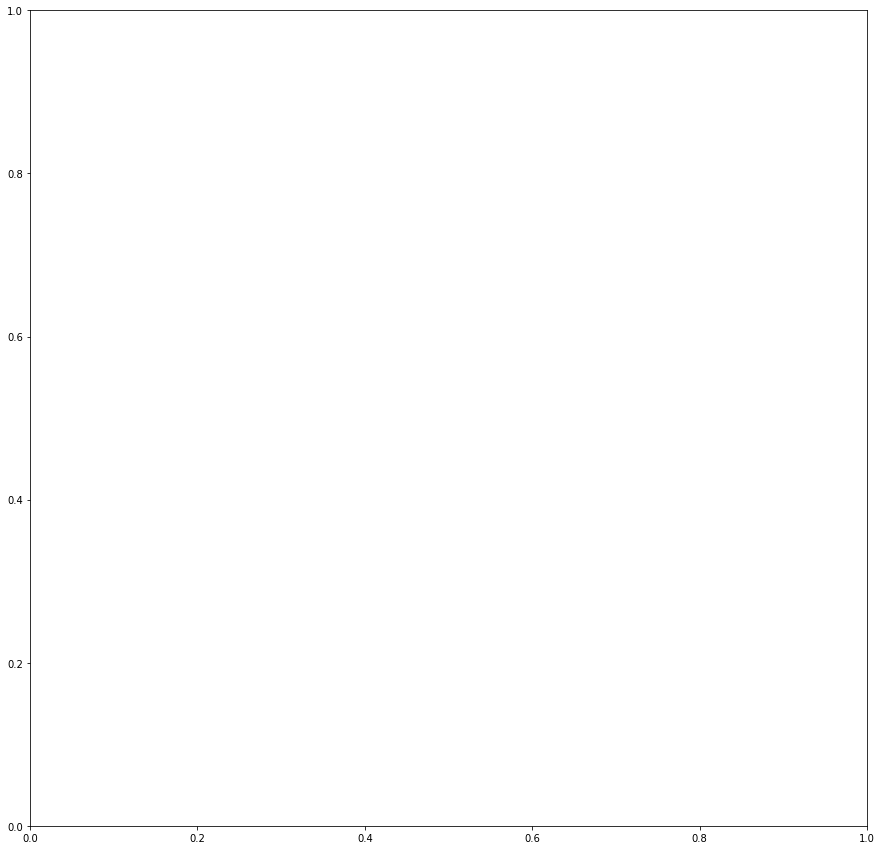

In [136]:
# files_2 = [ge_ge,ge_mix,ge_tosh, mix_ge,mix_mix,mix_tosh,tosh_ge,tosh_mix ,tosh_tosh ]
files_3  = [cl]
# names = ['Clinical Features', 'Radiomics','Clinical + Radiomics']
# names = ['Wavelet features']

# names = ['GE-GE','GE-MIX','GE-TOSHIBA','Mix-GE','Mix-Mix','Mix-Toshiba','TOSHIBA-GE','TOSHIBA-Mix','TOSHIBA-TOSHIBA']
names = ['Toxicity']
fig, ax = plt.subplots(figsize = (15,15))

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for name,file in zip(names,files_3):
    mean_tpr, mean_fpr, mean_auc, std_auc ,tprs= calc_avg_values(file)
    ax.plot(mean_fpr, mean_tpr,label=r'%s (%0.2f $\pm$ %0.2f)' % (name,mean_auc, std_auc),lw=2, alpha=.8)
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2)
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)    
# plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xticks([])
plt.xlabel("Flase Positive Rate", fontsize=20)
# plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.yticks([])
plt.ylabel("True Positive Rate", fontsize=20)
plt.title('Five randombly selected features', fontweight='bold', fontsize=20)
plt.legend(prop={'size':15}, loc='lower right')   
plt.show()

In [132]:
50 * 18

900